# Problem Statement

## Context

In the realm of modern finance, businesses encounter the perpetual challenge of managing debt obligations effectively to maintain a favorable credit standing and foster sustainable growth. Investors keenly scrutinize companies capable of navigating financial complexities while ensuring stability and profitability. A pivotal instrument in this evaluation process is the balance sheet, which provides a comprehensive overview of a company's assets, liabilities, and shareholder equity, offering insights into its financial health and operational efficiency. In this context, leveraging available financial data, particularly from preceding fiscal periods, becomes imperative for informed decision-making and strategic planning.

## Objective

A renowned credit rating organization wants to develop a Financial Health Assessment Tool. With the help of the tool, it endeavors to empower businesses and investors with a robust mechanism for evaluating the financial well-being and creditworthiness of companies. By harnessing machine learning techniques, the organization aims to analyze historical financial statements and extract pertinent insights to facilitate informed decision-making via the tool. Specifically, the organization foresees facilitating the following with the help of the tool:

1. Debt Management Analysis: Identify patterns and trends in debt management practices to assess the ability of businesses to fulfill financial obligations promptly and efficiently, and identify potential cases of default.

2. Credit Risk Evaluation: Evaluate credit risk exposure by analyzing liquidity ratios, debt-to-equity ratios, and other key financial indicators to ascertain the likelihood of default and inform investment decisions.

As a part of the data science team in the organization, you have been provided with the financial metrics of different companies. The task is to analyze the data provided and develop a predictive model leveraging machine learning techniques to identify whether a given company will default on its debt repayments in the next two quarters. The predictive model will help the organization anticipate potential challenges with the financial performance of the companies and enable proactive risk mitigation strategies.

## Data Dictionary

The data consists of financial metrics from the balance sheets of different companies. The detailed data dictionary is available in the data dictionary file (*FRA_DataDictionary.xlsx*).

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV   
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as SM
from sklearn import metrics

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    classification_report
)

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }<\style>'))

# Loading the Data

In [2]:
df = pd.read_excel(r'C:\Users\Ckhop\Dropbox\My PC (LAPTOP-48O7E0E8)\Downloads\FRA Part A\CompData.xlsx')  

# Data Overview

In [3]:
df.head() 

Co_Code          Co_Name  _Operating_Expense_Rate  \
0    16974      Hind.Cables             8.820000e+09   
1    21214  Tata Tele. Mah.             9.380000e+09   
2    14852     ABG Shipyard             3.800000e+09   
3     2439              GTL             6.440000e+09   
4    23505  Bharati Defence             3.680000e+09   

   _Research_and_development_expense_rate  _Cash_flow_rate  \
0                            0.000000e+00         0.462045   
1                            4.230000e+09         0.460116   
2                            8.150000e+08         0.449893   
3                            0.000000e+00         0.462731   
4                            0.000000e+00         0.463117   

   _Interest_bearing_debt_interest_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
0                              0.000352     0.001417              0.322558   
1                              0.000716     0.000000              0.315520   
2                              0.000496     0.000000              0.299851   
3                              0.000592     0.009313              0.319834   
4                              0.000782     0.400243              0.325104   

   _Per_Share_Net_profit_before_tax_Yuan_  \
0                                0.194472   
1                                0.161633   
2                                0.172554   
3                                0.174738   
4                                0.176546   

   _Realized_Sales_Gross_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
0                                  0.022074  ...              0.310901   
1                                  0.021902  ...              0.314572   
2                                  0.022186  ...              0.314777   
3                                  0.027638  ...              0.316974   
4                                  0.022072  ...              0.317729   

   _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
0                              0.034913                       0   
1                              0.041653                       0   
2                              0.033560                       0   
3                              0.016527                       0   
4                              0.034497                       0   

   _Total_assets_to_GNP_price  _No_credit_Interval  \
0                    0.028801             0.620927   
1                    0.006191             0.622513   
2                    0.001095             0.623749   
3                    0.003749             0.622963   
4                    0.006595             0.624419   

   _Degree_of_Financial_Leverage_DFL  \
0                           0.026930   
1                           0.026297   
2                           0.027276   
3                           0.026988   
4                           0.027498   

   _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
0                                           0.565744                 1   
1                                           0.560741                 1   
2                                           0.566744                 1   
3                                           0.565950                 1   
4                                           0.567177                 1   

   _Equity_to_Liability  Default  
0              0.015338        0  
1              0.029445        1  
2              0.041718        0  
3              0.026956        0  
4              0.019900        0  

[5 rows x 58 columns]

In [4]:
df.tail() 

Co_Code           Co_Name  _Operating_Expense_Rate  \
2053     2743  Kothari Ferment.             3.021580e-04   
2054    21216    Firstobj.Tech.             1.371450e-04   
2055      142  Diamines & Chem.             2.114990e-04   
2056    18014       IL&FS Engg.             3.750000e+09   
2057    43229      Channel Nine             2.981110e-04   

      _Research_and_development_expense_rate  _Cash_flow_rate  \
2053                            6.490000e+09         0.477066   
2054                            0.000000e+00         0.465211   
2055                            8.370000e+09         0.480248   
2056                            0.000000e+00         0.474670   
2057                            0.000000e+00         0.467203   

      _Interest_bearing_debt_interest_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
2053                              0.000000     0.183014              0.322063   
2054                              0.000658     0.000000              0.319764   
2055                              0.000502     0.000000              0.327828   
2056                              0.000578     0.306205              0.322027   
2057                              0.000826     0.000000              0.330021   

      _Per_Share_Net_profit_before_tax_Yuan_  \
2053                                0.192739   
2054                                0.169391   
2055                                0.155005   
2056                                0.173834   
2057                                0.180236   

      _Realized_Sales_Gross_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
2053                                  0.022127  ...              0.320387   
2054                                  0.022072  ...              0.312324   
2055                                  0.021861  ...              0.313122   
2056                                  0.022167  ...              0.315632   
2057                                  0.022418  ...              0.316734   

      _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
2053                              0.004430                       0   
2054                              0.032284                       0   
2055                              0.040998                       0   
2056                              0.020275                       0   
2057                              0.031368                       0   

      _Total_assets_to_GNP_price  _No_credit_Interval  \
2053                    0.000420             0.624567   
2054                    0.000882             0.624008   
2055                    0.009579             0.623718   
2056                    0.004958             0.623443   
2057                    0.000186             0.623588   

      _Degree_of_Financial_Leverage_DFL  \
2053                           0.026791   
2054                           0.024201   
2055                           0.026702   
2056                           0.026943   
2057                           0.026871   

      _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
2053                                           0.565158                 1   
2054                                           0.573670                 1   
2055                                           0.564697                 1   
2056                                           0.565792                 1   
2057                                           0.565512                 1   

      _Equity_to_Liability  Default  
2053              0.171662        0  
2054              0.053740        0  
2055              0.054984        0  
2056              0.057553        0  
2057              0.020266        0  

[5 rows x 58 columns]

In [5]:
df.shape 

(2058, 58)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [7]:
for col in df.columns:
    if col.startswith('_'):
        df.rename(columns={col: col[1:]}, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Co_Code                                           2058 non-null   int64  
 1   Co_Name                                           2058 non-null   object 
 2   Operating_Expense_Rate                            2058 non-null   float64
 3   Research_and_development_expense_rate             2058 non-null   float64
 4   Cash_flow_rate                                    2058 non-null   float64
 5   Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   Tax_rate_A                                        2058 non-null   float64
 7   Cash_Flow_Per_Share                               1891 non-null   float64
 8   Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   Realized_Sales_Gros

In [9]:
df.duplicated().sum() 

0

In [10]:
df.nunique() 

Co_Code                                             2058
Co_Name                                             2058
Operating_Expense_Rate                              1495
Research_and_development_expense_rate                629
Cash_flow_rate                                      1888
Interest_bearing_debt_interest_rate                  813
Tax_rate_A                                           985
Cash_Flow_Per_Share                                  900
Per_Share_Net_profit_before_tax_Yuan_                876
Realized_Sales_Gross_Profit_Growth_Rate             1939
Operating_Profit_Growth_Rate                        2015
Continuous_Net_Profit_Growth_Rate                   2014
Total_Asset_Growth_Rate                              922
Net_Value_Growth_Rate                               1757
Total_Asset_Return_Growth_Rate_Ratio                1428
Cash_Reinvestment_perc                              1690
Current_Ratio                                       1972
Quick_Ratio                    

In [11]:
df.describe().T

count          mean  \
Co_Code                                           2058.0  1.757211e+04   
Operating_Expense_Rate                            2058.0  2.052389e+09   
Research_and_development_expense_rate             2058.0  1.208634e+09   
Cash_flow_rate                                    2058.0  4.652426e-01   
Interest_bearing_debt_interest_rate               2058.0  1.113022e+07   
Tax_rate_A                                        2058.0  1.147770e-01   
Cash_Flow_Per_Share                               1891.0  3.199856e-01   
Per_Share_Net_profit_before_tax_Yuan_             2058.0  1.769673e-01   
Realized_Sales_Gross_Profit_Growth_Rate           2058.0  2.276117e-02   
Operating_Profit_Growth_Rate                      2058.0  8.481083e-01   
Continuous_Net_Profit_Growth_Rate                 2058.0  2.173915e-01   
Total_Asset_Growth_Rate                           2058.0  5.287663e+09   
Net_Value_Growth_Rate                             2058.0  5.189504e+06   
Total_Asset_Return_Growth_Rate_Ratio              2058.0  2.641004e-01   
Cash_Reinvestment_perc                            2058.0  3.771970e-01   
Current_Ratio                                     2058.0  1.336249e+06   
Quick_Ratio                                       2058.0  2.775510e+07   
Interest_Expense_Ratio                            2058.0  6.312913e-01   
Total_debt_to_Total_net_worth                     2037.0  1.071429e+07   
Long_term_fund_suitability_ratio_A                2058.0  8.973310e-03   
Net_profit_before_tax_to_Paid_in_capital          2058.0  1.753994e-01   
Total_Asset_Turnover                              2058.0  1.286405e-01   
Accounts_Receivable_Turnover                      2058.0  4.159864e+07   
Average_Collection_Days                           2058.0  2.629786e+07   
Inventory_Turnover_Rate_times                     2058.0  2.030227e+09   
Fixed_Assets_Turnover_Frequency                   2058.0  1.230898e+09   
Net_Worth_Turnover_Rate_times                     2058.0  3.957710e-02   
Operating_profit_per_person                       2058.0  4.036693e-01   
Allocation_rate_per_person                        2058.0  5.725559e+06   
Quick_Assets_to_Total_Assets                      2058.0  3.421979e-01   
Cash_to_Total_Assets                              1962.0  7.993675e-02   
Quick_Assets_to_Current_Liability                 2058.0  1.190476e+07   
Cash_to_Current_Liability                         2058.0  9.282507e+07   
Operating_Funds_to_Liability                      2058.0  3.482338e-01   
Inventory_to_Working_Capital                      2058.0  2.777491e-01   
Inventory_to_Current_Liability                    2058.0  5.786346e+07   
Long_term_Liability_to_Current_Assets             2058.0  7.340107e+07   
Retained_Earnings_to_Total_Assets                 2058.0  9.303546e-01   
Total_income_to_Total_expense                     2058.0  2.357977e-03   
Total_expense_to_Assets                           2058.0  3.109208e-02   
Current_Asset_Turnover_Rate                       2058.0  1.273303e+09   
Quick_Asset_Turnover_Rate                         2058.0  2.571768e+09   
Cash_Turnover_Rate                                2058.0  2.653696e+09   
Fixed_Assets_to_Assets                            2058.0  4.042760e+06   
Cash_Flow_to_Total_Assets                         2058.0  6.442325e-01   
Cash_Flow_to_Liability                            2058.0  4.599747e-01   
CFO_to_Assets                                     2058.0  5.797344e-01   
Cash_Flow_to_Equity                               2058.0  3.146292e-01   
Current_Liability_to_Current_Assets               2044.0  3.935178e-02   
Liability_Assets_Flag                             2058.0  3.401361e-03   
Total_assets_to_GNP_price                         2058.0  2.779397e+07   
No_credit_Interval                                2058.0  6.236856e-01   
Degree_of_Financial_Leverage_DFL                  2058.0  2.785248e-02   
Interest_Coverage_Ratio_Interest_expense_to_EBIT  2058.

* We can see that `Co_Code` and `Co_Name` are not relevant for this exercise
* So we will drop these variables

In [12]:
df.drop(['Co_Code', 'Co_Name'], axis = 1, inplace = True)

# Exploratory Data Analysis

## Univariate Analysis

In [13]:
df["Default"].unique()  

array([0, 1], dtype=int64)

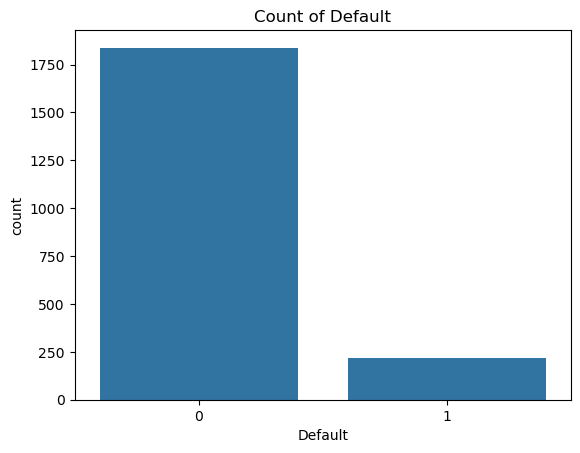

In [14]:
sns.countplot(x = "Default", data = df)  
plt.title('Count of Default')
plt.show() 

In [15]:
df.Default.value_counts()

Default
0    1838
1     220
Name: count, dtype: int64

In [16]:
(df.Default.sum()/len(df)) * 100

10.689990281827017

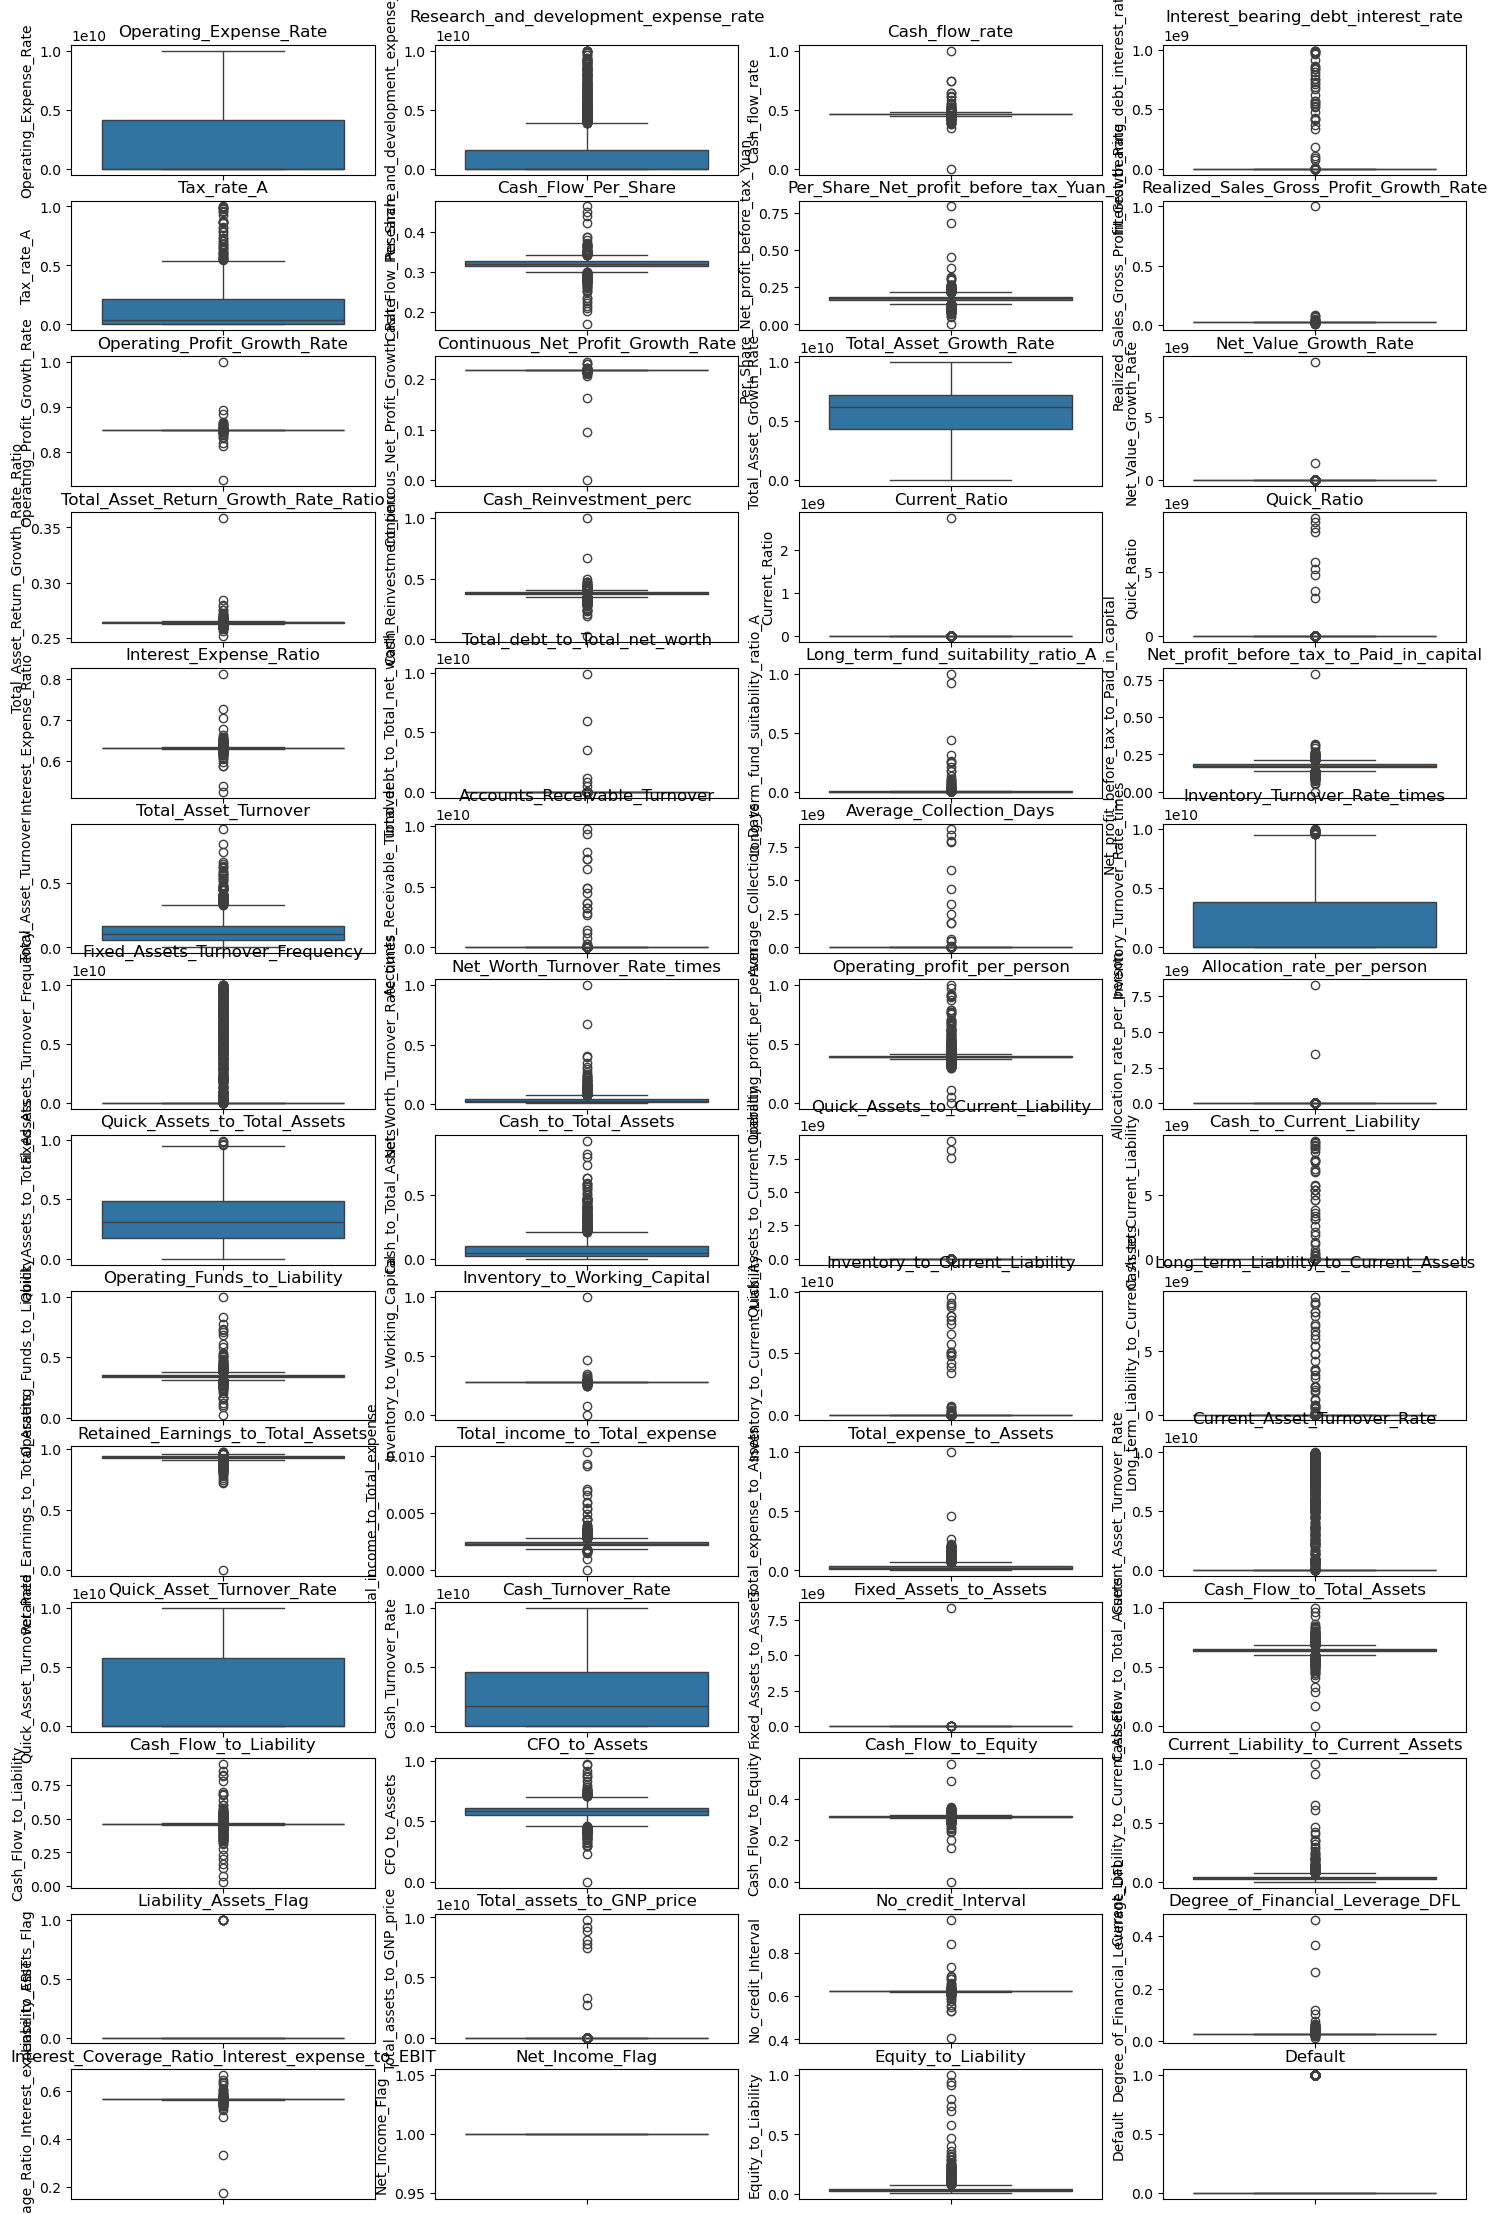

In [17]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.boxplot(data=df, y=variable)  
    plt.title(variable)

## Bivariate Analysis

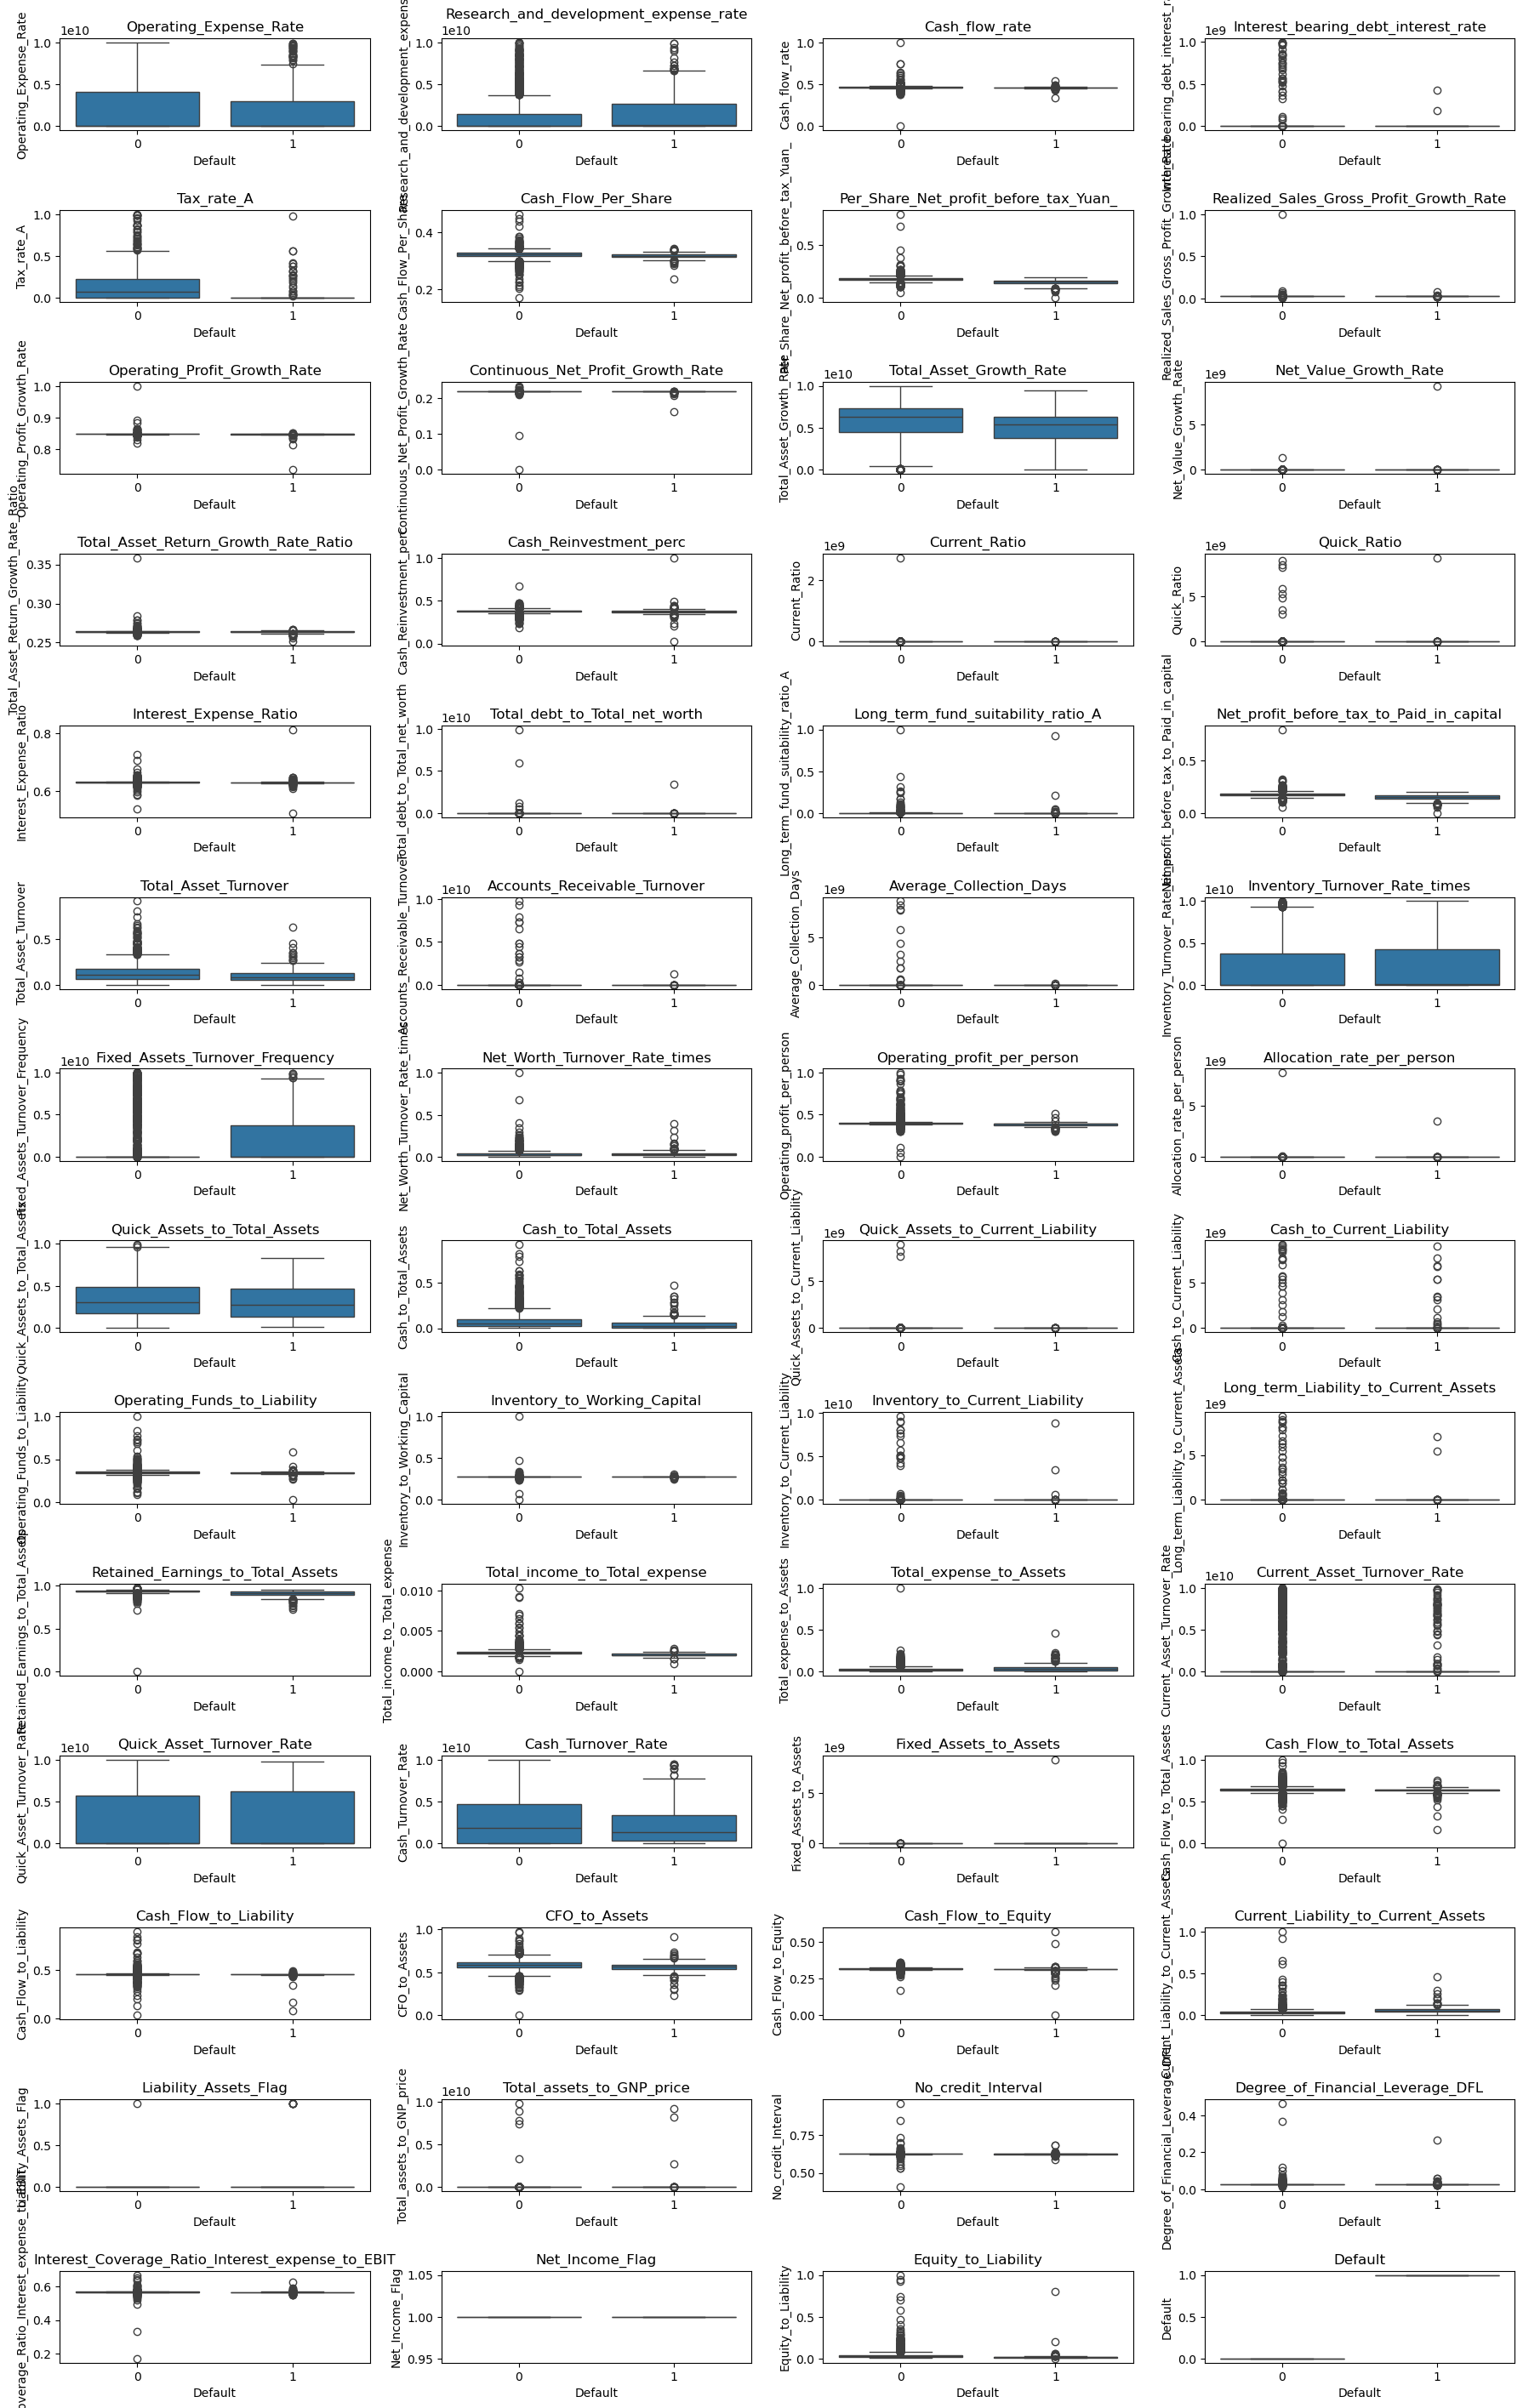

In [18]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.boxplot(data=df, x='Default', y=variable)  
    plt.tight_layout()
    plt.title(variable)

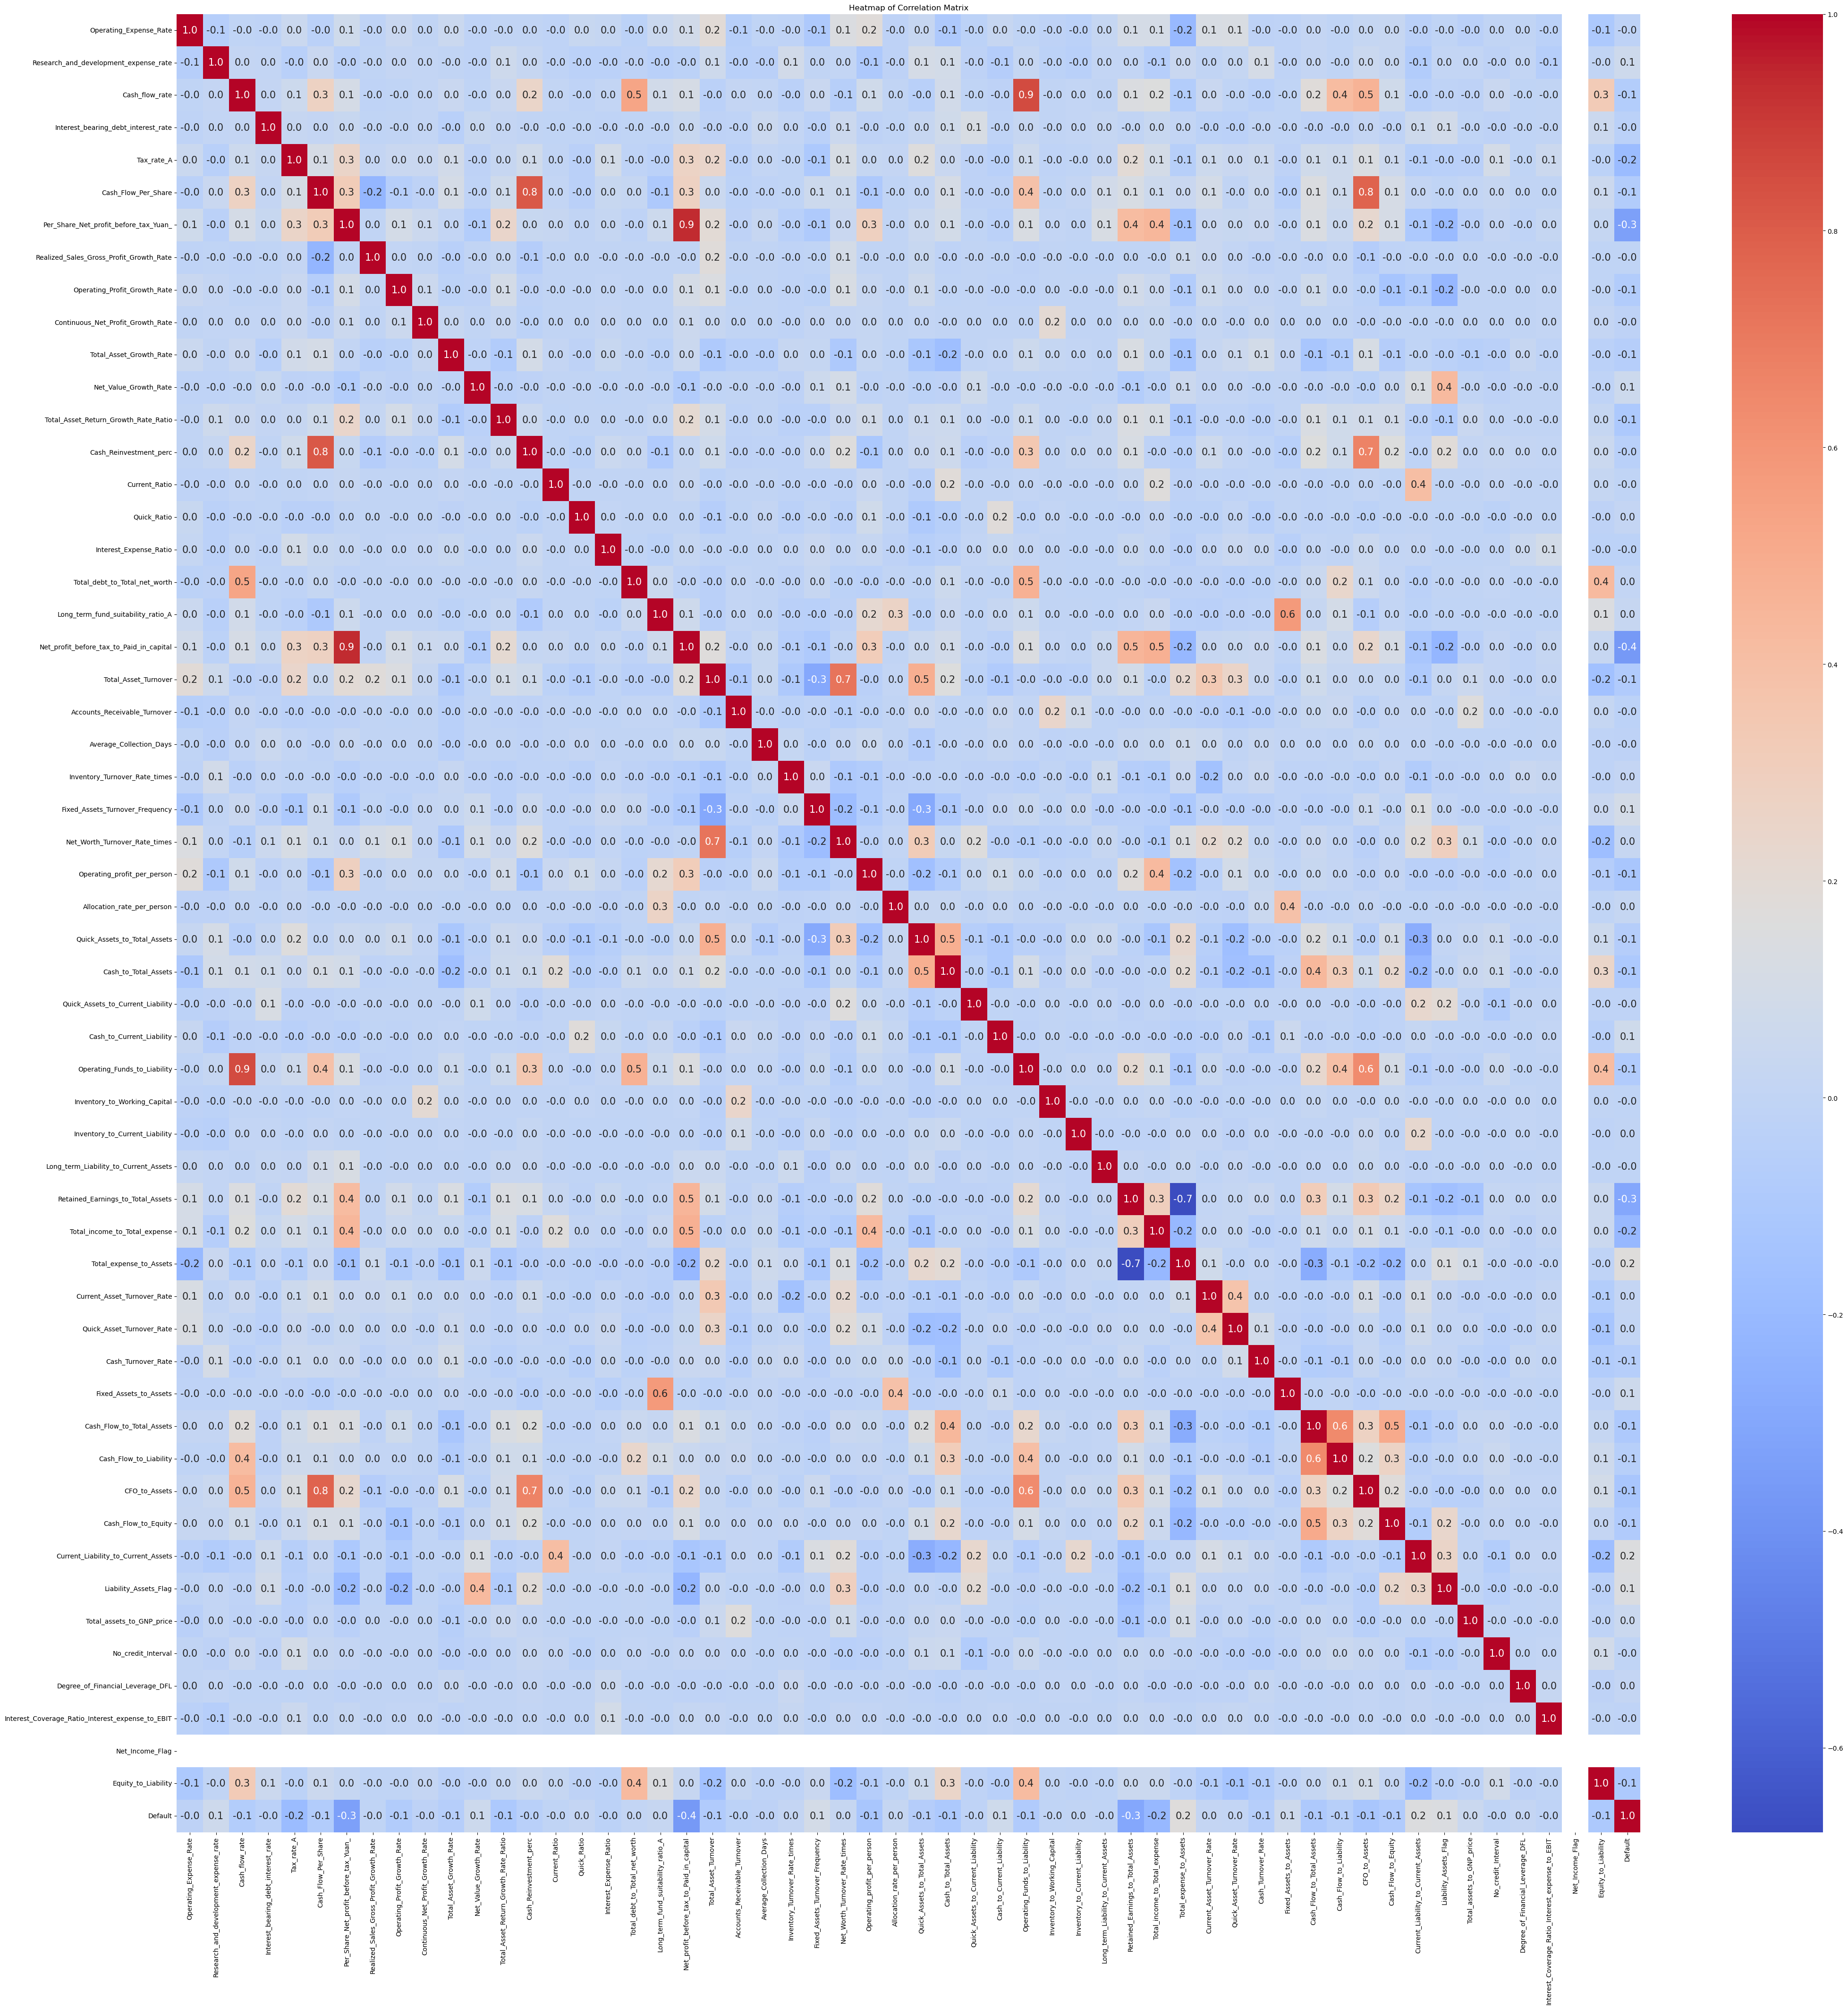

In [19]:
corr_matrix = df.corr(numeric_only=True)  

plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 15})
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Data Preprocessing

## Dropping columns with few unique values

In [20]:
df.nunique()

Operating_Expense_Rate                              1495
Research_and_development_expense_rate                629
Cash_flow_rate                                      1888
Interest_bearing_debt_interest_rate                  813
Tax_rate_A                                           985
Cash_Flow_Per_Share                                  900
Per_Share_Net_profit_before_tax_Yuan_                876
Realized_Sales_Gross_Profit_Growth_Rate             1939
Operating_Profit_Growth_Rate                        2015
Continuous_Net_Profit_Growth_Rate                   2014
Total_Asset_Growth_Rate                              922
Net_Value_Growth_Rate                               1757
Total_Asset_Return_Growth_Rate_Ratio                1428
Cash_Reinvestment_perc                              1690
Current_Ratio                                       1972
Quick_Ratio                                         1970
Interest_Expense_Ratio                              1716
Total_debt_to_Total_net_worth  

We can drop the columns `Net_Income_Flag` and `Liability_Assets_Flag` as they have very few unique values.

In [21]:
df.drop(['Net_Income_Flag', 'Liability_Assets_Flag'], axis = 1, inplace = True)  
df.nunique()

Operating_Expense_Rate                              1495
Research_and_development_expense_rate                629
Cash_flow_rate                                      1888
Interest_bearing_debt_interest_rate                  813
Tax_rate_A                                           985
Cash_Flow_Per_Share                                  900
Per_Share_Net_profit_before_tax_Yuan_                876
Realized_Sales_Gross_Profit_Growth_Rate             1939
Operating_Profit_Growth_Rate                        2015
Continuous_Net_Profit_Growth_Rate                   2014
Total_Asset_Growth_Rate                              922
Net_Value_Growth_Rate                               1757
Total_Asset_Return_Growth_Rate_Ratio                1428
Cash_Reinvestment_perc                              1690
Current_Ratio                                       1972
Quick_Ratio                                         1970
Interest_Expense_Ratio                              1716
Total_debt_to_Total_net_worth  

## Outliers Check

In [22]:
outliers_count = {}

for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR 

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

print("Number of outliers in each column:")
pd.DataFrame([{'Column': column, 'No. of outliers': outliers} for column, outliers in outliers_count.items()])

Number of outliers in each column:


Column  No. of outliers
0                             Operating_Expense_Rate                0
1              Research_and_development_expense_rate              264
2                                     Cash_flow_rate              206
3                Interest_bearing_debt_interest_rate               94
4                                         Tax_rate_A               42
5                                Cash_Flow_Per_Share              146
6              Per_Share_Net_profit_before_tax_Yuan_              186
7            Realized_Sales_Gross_Profit_Growth_Rate              283
8                       Operating_Profit_Growth_Rate              317
9                  Continuous_Net_Profit_Growth_Rate              340
10                           Total_Asset_Growth_Rate                0
11                             Net_Value_Growth_Rate              304
12              Total_Asset_Return_Growth_Rate_Ratio              226
13                            Cash_Reinvestment_perc              220
14                                     Current_Ratio              193
15                                       Quick_Ratio              190
16                            Interest_Expense_Ratio              328
17                     Total_debt_to_Total_net_worth              105
18                Long_term_fund_suitability_ratio_A              234
19          Net_profit_before_tax_to_Paid_in_capital              173
20                              Total_Asset_Turnover              101
21                      Accounts_Receivable_Turnover              281
22                           Average_Collection_Days               77
23                     Inventory_Turnover_Rate_times               29
24                   Fixed_Assets_Turnover_Frequency              501
25                     Net_Worth_Turnover_Rate_times              165
26                       Operating_profit_per_person              357
27                        Allocation_rate_per_person              200
28                      Quick_Assets_to_Total_Assets                4
29                              Cash_to_Total_Assets              163
30                 Quick_Assets_to_Current_Liability              185
31                         Cash_to_Current_Liability              253
32                      Operating_Funds_to_Liability              219
33                      Inventory_to_Working_Capital              247
34                    Inventory_to_Current_Liability              129
35             Long_term_Liability_to_Current_Assets              213
36                 Retained_Earnings_to_Total_Assets              208
37                     Total_income_to_Total_expense              136
38                           Total_expense_to_Assets              168
39                       Current_Asset_Turnover_Rate              464
40                         Quick_Asset_Turnover_Rate                0
41                                Cash_Turnover_Rate                0
42                            Fixed_Assets_to_Assets               10
43                         Cash_Flow_to_Total_Assets              317
44                            Cash_Flow_to_Liability              407
45                                     CFO_to_Assets              110
46                               Cash_Flow_to_Equity              306
47               Current_Liability_to_Current_Assets              121
48                         Total_assets_to_GNP_price              235
49                                No_credit_Interval              396
50                  Degree_of_Financial_Leverage_DFL              438
51  Interest_Coverage_Ratio_Interest_expense_to_EBIT              376
52                               Equity_to_Liability              190
53                                           Default              220

## Data Preparation for Modeling

In [23]:
df_X = df.drop(['Default'], axis = 1)
df_y = df['Default']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42, stratify = df_y)  

## Missing Values Detection and Treatment

In [25]:
X_train.isna().sum()  

Operating_Expense_Rate                                0
Research_and_development_expense_rate                 0
Cash_flow_rate                                        0
Interest_bearing_debt_interest_rate                   0
Tax_rate_A                                            0
Cash_Flow_Per_Share                                 126
Per_Share_Net_profit_before_tax_Yuan_                 0
Realized_Sales_Gross_Profit_Growth_Rate               0
Operating_Profit_Growth_Rate                          0
Continuous_Net_Profit_Growth_Rate                     0
Total_Asset_Growth_Rate                               0
Net_Value_Growth_Rate                                 0
Total_Asset_Return_Growth_Rate_Ratio                  0
Cash_Reinvestment_perc                                0
Current_Ratio                                         0
Quick_Ratio                                           0
Interest_Expense_Ratio                                0
Total_debt_to_Total_net_worth                   

In [26]:
X_test.isnull().sum()

Operating_Expense_Rate                               0
Research_and_development_expense_rate                0
Cash_flow_rate                                       0
Interest_bearing_debt_interest_rate                  0
Tax_rate_A                                           0
Cash_Flow_Per_Share                                 41
Per_Share_Net_profit_before_tax_Yuan_                0
Realized_Sales_Gross_Profit_Growth_Rate              0
Operating_Profit_Growth_Rate                         0
Continuous_Net_Profit_Growth_Rate                    0
Total_Asset_Growth_Rate                              0
Net_Value_Growth_Rate                                0
Total_Asset_Return_Growth_Rate_Ratio                 0
Cash_Reinvestment_perc                               0
Current_Ratio                                        0
Quick_Ratio                                          0
Interest_Expense_Ratio                               0
Total_debt_to_Total_net_worth                        3
Long_term_

In [27]:
KNNimputerModel = KNNImputer(n_neighbors=5)  
X_train = pd.DataFrame(KNNimputerModel.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(KNNimputerModel.fit_transform(X_test), columns = X_test.columns)  

In [28]:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
0


## Scaling the Data

In [29]:
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.fit_transform(X_test), columns=X_test.columns)  

In [30]:
X_train_scaled.head()

Operating_Expense_Rate  Research_and_development_expense_rate  \
0               -0.633296                              -0.396806   
1               -0.633296                              -0.561672   
2               -0.633296                               0.361946   
3               -0.633296                              -0.561672   
4               -0.633296                              -0.561672   

   Cash_flow_rate  Interest_bearing_debt_interest_rate  Tax_rate_A  \
0       -0.132455                            -0.128462   -0.754347   
1       -0.934352                            -0.128462   -0.754347   
2       -0.290335                            -0.128462    0.061964   
3       -0.179548                            -0.128462   -0.754347   
4       -0.123892                            -0.128462   -0.754347   

   Cash_Flow_Per_Share  Per_Share_Net_profit_before_tax_Yuan_  \
0             0.088170                              -0.902611   
1            -1.224514                              -1.111709   
2            -0.409659                               0.227000   
3            -0.077773                              -0.482011   
4            -0.168422                              -0.768019   

   Realized_Sales_Gross_Profit_Growth_Rate  Operating_Profit_Growth_Rate  \
0                                -0.156311                     -0.129315   
1                               -10.373320                     -0.055710   
2                                -0.087271                     -0.023725   
3                                -0.188306                     -0.069048   
4                                -0.247137                     -0.027705   

   Continuous_Net_Profit_Growth_Rate  ...  Cash_Flow_to_Total_Assets  \
0                           0.021636  ...                  -0.152255   
1                           0.038318  ...                  -0.163912   
2                           0.037770  ...                  -0.636642   
3                           0.038921  ...                  -0.042653   
4                           0.035840  ...                   0.294471   

   Cash_Flow_to_Liability  CFO_to_Assets  Cash_Flow_to_Equity  \
0               -0.026487       0.101957            -0.141788   
1               -0.045322      -2.637987            -0.085051   
2               -0.170355      -0.477991            -0.363851   
3               -0.006164      -0.123538            -0.041367   
4                0.073490      -0.101885             0.197825   

   Current_Liability_to_Current_Assets  Total_assets_to_GNP_price  \
0                             0.469507                  -0.054112   
1                             1.075174                  -0.054112   
2                             0.116437                  -0.054112   
3                             1.150645                  -0.054112   
4                             1.009522                  -0.054112   

   No_credit_Interval  Degree_of_Financial_Leverage_DFL  \
0           -0.034152                         -0.092390   
1           -0.004818                         -0.083738   
2            0.004516                         -0.060604   
3            4.471330                         -0.122720   
4            0.028995                         -0.089020   

   Interest_Coverage_Ratio_Interest_expense_to_EBIT  Equity_to_Liability  
0                                         -0.057822            -0.469266  
1                                         -0.018937            -0.200363  
2                                          0.056889            -0.266282  
3                                         -0.290236            -0.531511  
4                                         -0.041776            -0.338544  

[5 rows x 53 columns]

In [31]:
X_test_scaled.head()

Operating_Expense_Rate  Research_and_development_expense_rate  \
0               -0.624747                               1.618480   
1                2.066113                               0.155953   
2               -0.624747                               0.199252   
3               -0.624747                               2.248714   
4                0.793787                               0.329147   

   Cash_flow_rate  Interest_bearing_debt_interest_rate  Tax_rate_A  \
0        0.067368                            -0.105996   -0.750668   
1        0.269076                            -0.105996   -0.750668   
2       -0.094706                            -0.105996    0.045677   
3       -0.422399                            -0.105996   -0.750668   
4       -0.037956                            -0.105996    0.647247   

   Cash_Flow_Per_Share  Per_Share_Net_profit_before_tax_Yuan_  \
0             0.054081                              -0.882269   
1             0.152716                              -0.435008   
2             0.106686                               0.109733   
3            -0.866508                              -3.287731   
4             0.518759                               0.459514   

   Realized_Sales_Gross_Profit_Growth_Rate  Operating_Profit_Growth_Rate  \
0                                -0.044385                      0.042232   
1                                -0.053191                      0.001506   
2                                -0.054731                     -0.038247   
3                                -0.058077                     -0.955618   
4                                -0.053160                     -0.002079   

   Continuous_Net_Profit_Growth_Rate  ...  Cash_Flow_to_Total_Assets  \
0                           0.013808  ...                   0.226587   
1                          -0.020895  ...                  -0.203165   
2                           0.039466  ...                  -0.881500   
3                          -0.351450  ...                  -2.716070   
4                           0.027948  ...                   0.059753   

   Cash_Flow_to_Liability  CFO_to_Assets  Cash_Flow_to_Equity  \
0               -0.026303       1.326384             0.331992   
1               -0.133590       0.253178            -0.068507   
2               -0.231628      -0.043067            -0.748090   
3               -0.459726      -2.264836            -3.607839   
4               -0.052663       0.414240             0.136320   

   Current_Liability_to_Current_Assets  Total_assets_to_GNP_price  \
0                             0.091195                  15.761384   
1                            -0.104667                  -0.071478   
2                             0.345679                  -0.071478   
3                            -0.134787                  -0.071478   
4                            -0.175022                  -0.071478   

   No_credit_Interval  Degree_of_Financial_Leverage_DFL  \
0           -0.006331                         -0.074521   
1            0.033771                         -0.095747   
2           -0.418625                         -0.063956   
3           -0.001527                         -0.074285   
4            0.045728                         -0.072275   

   Interest_Coverage_Ratio_Interest_expense_to_EBIT  Equity_to_Liability  
0                                         -0.147943            -0.347587  
1                                         -1.144762             0.097076  
2                                          0.098718            -0.289754  
3                                         -0.141347            -0.381526  
4                                         -0.087539            -0.330921  

[5 rows x 53 columns]

#Model Building

## Model Evaluation Criterion

*Metric of Choice*
-


In [32]:
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    y_pred = model.predict(predictors)

    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    acc = accuracy_score(target, y_pred)  
    recall = recall_score(target, y_pred)  
    precision = precision_score(target, y_pred)  
    f1 = f1_score(target, y_pred) 

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [33]:
def model_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression

In [34]:
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)

In [35]:
X_train_with_intercept.head()

const  Operating_Expense_Rate  Research_and_development_expense_rate  \
0    1.0               -0.633296                              -0.396806   
1    1.0               -0.633296                              -0.561672   
2    1.0               -0.633296                               0.361946   
3    1.0               -0.633296                              -0.561672   
4    1.0               -0.633296                              -0.561672   

   Cash_flow_rate  Interest_bearing_debt_interest_rate  Tax_rate_A  \
0       -0.132455                            -0.128462   -0.754347   
1       -0.934352                            -0.128462   -0.754347   
2       -0.290335                            -0.128462    0.061964   
3       -0.179548                            -0.128462   -0.754347   
4       -0.123892                            -0.128462   -0.754347   

   Cash_Flow_Per_Share  Per_Share_Net_profit_before_tax_Yuan_  \
0             0.088170                              -0.902611   
1            -1.224514                              -1.111709   
2            -0.409659                               0.227000   
3            -0.077773                              -0.482011   
4            -0.168422                              -0.768019   

   Realized_Sales_Gross_Profit_Growth_Rate  Operating_Profit_Growth_Rate  ...  \
0                                -0.156311                     -0.129315  ...   
1                               -10.373320                     -0.055710  ...   
2                                -0.087271                     -0.023725  ...   
3                                -0.188306                     -0.069048  ...   
4                                -0.247137                     -0.027705  ...   

   Cash_Flow_to_Total_Assets  Cash_Flow_to_Liability  CFO_to_Assets  \
0                  -0.152255               -0.026487       0.101957   
1                  -0.163912               -0.045322      -2.637987   
2                  -0.636642               -0.170355      -0.477991   
3                  -0.042653               -0.006164      -0.123538   
4                   0.294471                0.073490      -0.101885   

   Cash_Flow_to_Equity  Current_Liability_to_Current_Assets  \
0            -0.141788                             0.469507   
1            -0.085051                             1.075174   
2            -0.363851                             0.116437   
3            -0.041367                             1.150645   
4             0.197825                             1.009522   

   Total_assets_to_GNP_price  No_credit_Interval  \
0                  -0.054112           -0.034152   
1                  -0.054112           -0.004818   
2                  -0.054112            0.004516   
3                  -0.054112            4.471330   
4                  -0.054112            0.028995   

   Degree_of_Financial_Leverage_DFL  \
0                         -0.092390   
1                         -0.083738   
2                         -0.060604   
3                         -0.122720   
4                         -0.089020   

   Interest_Coverage_Ratio_Interest_expense_to_EBIT  Equity_to_Liability  
0                                         -0.057822            -0.469266  
1                                         -0.018937            -0.200363  
2                                          0.056889            -0.266282  
3                                         -0.290236            -0.531511  
4                                         -0.041776            -0.338544  

[5 rows x 54 columns]

In [36]:
y_train.reset_index(inplace = True, drop = True)

In [37]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept)
result =  LogisticReg.fit()
print(result.summary())

         Current function value: 0.193946
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1543
Model:                          Logit   Df Residuals:                     1489
Method:                           MLE   Df Model:                           53
Date:                Mon, 22 Sep 2025   Pseudo R-squ.:                  0.4297
Time:                        17:42:17   Log-Likelihood:                -299.26
converged:                      False   LL-Null:                       -524.71
Covariance Type:            nonrobust   LLR p-value:                 1.764e-64
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -7.4685   2410.7

### Logistic Regression Model - Training Performance

In [38]:
y_prob_train = result.predict(X_train_with_intercept)
threshold = 0.5
y_pred_train = (y_prob_train > threshold).astype(int)

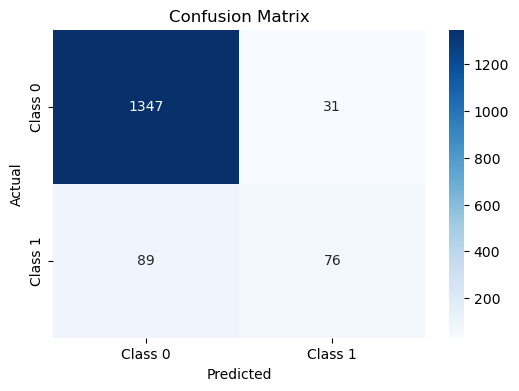

In [39]:
cm = confusion_matrix(y_train, y_pred_train)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [40]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1378
           1       0.71      0.46      0.56       165

    accuracy                           0.92      1543
   macro avg       0.82      0.72      0.76      1543
weighted avg       0.91      0.92      0.91      1543



In [41]:
classification_report_dict_train = classification_report(y_train, y_pred_train, output_dict=True)
logistic_regression_perf_train = pd.DataFrame(classification_report_dict_train)

### Logistic Regression Model - Test Performance

In [42]:
y_prob_test = result.predict(X_test_with_intercept)
threshold = 0.5
y_pred_test = (y_prob_test> threshold).astype(int)

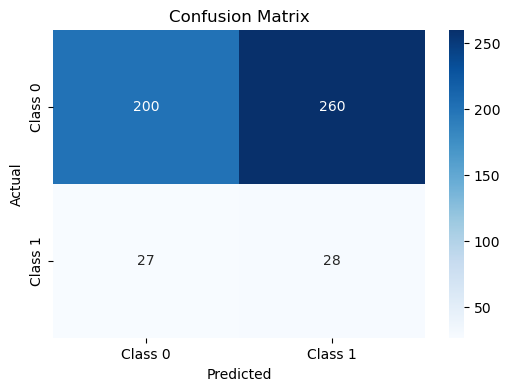

In [43]:
cm = confusion_matrix(y_test, y_pred_test)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [44]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.43      0.58       460
           1       0.10      0.51      0.16        55

    accuracy                           0.44       515
   macro avg       0.49      0.47      0.37       515
weighted avg       0.80      0.44      0.54       515



## Random Forest

In [45]:
rf_classifier = RandomForestClassifier(random_state=42)  
rf_model = rf_classifier.fit(X_train, y_train) 

### Random Forest Model - Training Performance

In [46]:
y_ran_train = rf_model.predict(X_train)

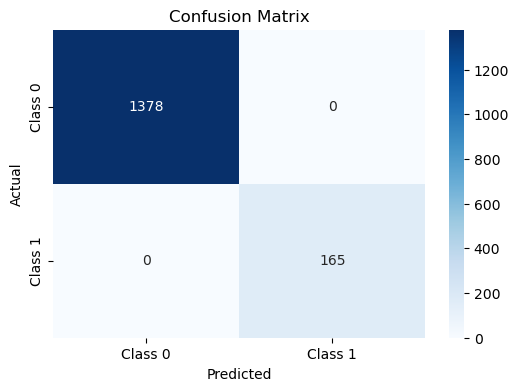

In [47]:
cm = confusion_matrix(y_train, y_ran_train)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [48]:
print(classification_report(y_train, y_ran_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1378
           1       1.00      1.00      1.00       165

    accuracy                           1.00      1543
   macro avg       1.00      1.00      1.00      1543
weighted avg       1.00      1.00      1.00      1543



In [49]:
cl_random_forest_perf_train = classification_report(y_train, y_ran_train, output_dict=True)
random_forest_perf_train = pd.DataFrame(cl_random_forest_perf_train)

### Random Forest Model - Test Performance

In [50]:
y_ran_test = rf_model.predict(X_test)  

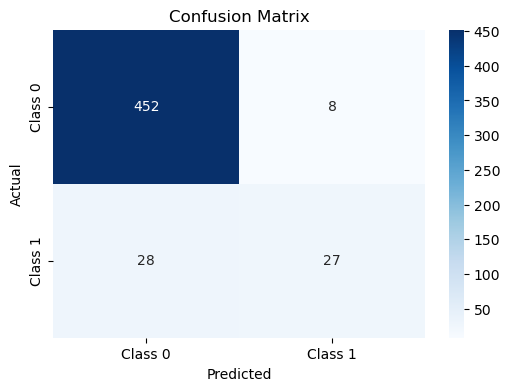

In [51]:
cm = confusion_matrix(y_test, y_ran_test)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [52]:
print(classification_report(y_test, y_ran_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       460
           1       0.77      0.49      0.60        55

    accuracy                           0.93       515
   macro avg       0.86      0.74      0.78       515
weighted avg       0.92      0.93      0.92       515



# Model Performance Improvement

## Model Performance Improvement - Logistic Regression

In [53]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [54]:
vif_result = calculate_vif(X_train_scaled)  

print("Variance Inflation Factors:")
vif_result

Variance Inflation Factors:


Variable        VIF
0                             Operating_Expense_Rate   1.259611
1              Research_and_development_expense_rate   1.099306
2                                     Cash_flow_rate  12.259184
3                Interest_bearing_debt_interest_rate   1.032597
4                                         Tax_rate_A   1.248346
5                                Cash_Flow_Per_Share   4.564430
6              Per_Share_Net_profit_before_tax_Yuan_   8.756612
7            Realized_Sales_Gross_Profit_Growth_Rate   1.058517
8                       Operating_Profit_Growth_Rate   1.152581
9                  Continuous_Net_Profit_Growth_Rate   1.467948
10                           Total_Asset_Growth_Rate   1.174794
11                             Net_Value_Growth_Rate   1.044367
12              Total_Asset_Return_Growth_Rate_Ratio   1.134845
13                            Cash_Reinvestment_perc   7.340538
14                                     Current_Ratio   4.945713
15                                       Quick_Ratio   1.063685
16                            Interest_Expense_Ratio   1.033551
17                     Total_debt_to_Total_net_worth   3.776391
18                Long_term_fund_suitability_ratio_A   1.839945
19          Net_profit_before_tax_to_Paid_in_capital   8.637685
20                              Total_Asset_Turnover   5.467530
21                      Accounts_Receivable_Turnover   1.064519
22                           Average_Collection_Days   1.060724
23                     Inventory_Turnover_Rate_times   1.100171
24                   Fixed_Assets_Turnover_Frequency   1.223623
25                     Net_Worth_Turnover_Rate_times   3.945259
26                       Operating_profit_per_person   1.568575
27                        Allocation_rate_per_person   1.198618
28                      Quick_Assets_to_Total_Assets   2.397607
29                              Cash_to_Total_Assets   2.183010
30                 Quick_Assets_to_Current_Liability   1.009579
31                         Cash_to_Current_Liability   1.079209
32                      Operating_Funds_to_Liability  12.536226
33                      Inventory_to_Working_Capital   1.459350
34                    Inventory_to_Current_Liability   1.124100
35             Long_term_Liability_to_Current_Assets   1.102010
36                 Retained_Earnings_to_Total_Assets   3.365775
37                     Total_income_to_Total_expense   1.676735
38                           Total_expense_to_Assets   3.366230
39                       Current_Asset_Turnover_Rate   1.416203
40                         Quick_Asset_Turnover_Rate   1.377544
41                                Cash_Turnover_Rate   1.107230
42                            Fixed_Assets_to_Assets   1.815190
43                         Cash_Flow_to_Total_Assets   3.309496
44                            Cash_Flow_to_Liability   2.813638
45                                     CFO_to_Assets  10.987676
46                               Cash_Flow_to_Equity   1.425404
47               Current_Liability_to_Current_Assets   1.464422
48                         Total_assets_to_GNP_price   1.041114
49                                No_credit_Interval   1.032531
50                  Degree_of_Financial_Leverage_DFL   1.015012
51  Interest_Coverage_Ratio_Interest_expense_to_EBIT   1.018535
52                               Equity_to_Liability   4.779776

In [55]:
high_vif_columns = []
for i, row in vif_result.iterrows():
    if row['VIF'] >= 5:
        high_vif_columns.append(row['Variable'])
high_vif_columns

['Cash_flow_rate',
 'Per_Share_Net_profit_before_tax_Yuan_',
 'Cash_Reinvestment_perc',
 'Net_profit_before_tax_to_Paid_in_capital',
 'Total_Asset_Turnover',
 'Operating_Funds_to_Liability',
 'CFO_to_Assets']

In [56]:
X_train_scaled.drop(columns = high_vif_columns, axis=1, inplace=True)
X_test_scaled.drop(columns = high_vif_columns, axis=1, inplace=True)

In [57]:
X_train_scaled.shape

(1543, 46)

In [58]:
X_test_scaled.shape

(515, 46)

In [59]:
X_train_new_with_intercept = SM.add_constant(X_train_scaled)
X_test_new_with_intercept = SM.add_constant(X_test_scaled)

In [60]:
constant_columns = [col for col in X_train_new_with_intercept.columns if X_train_new_with_intercept[col].nunique() == 1]
print("Constant columns:", constant_columns)

X_train_new_with_intercept.drop(columns=constant_columns, inplace=True)

duplicate_columns = X_train_new_with_intercept.T.duplicated()
X_train_new_with_intercept = X_train_new_with_intercept.loc[:, ~duplicate_columns]


Constant columns: ['const']


In [61]:
constant_columns_train = [col for col in X_train_new_with_intercept.columns if X_train_new_with_intercept[col].nunique() == 1]
print("Constant columns in training data:", constant_columns_train)

X_train_new_with_intercept.drop(columns=constant_columns_train, inplace=True)

constant_columns_test = [col for col in X_test_new_with_intercept.columns if X_test_new_with_intercept[col].nunique() == 1]
print("Constant columns in testing data:", constant_columns_test)

X_test_new_with_intercept.drop(columns=constant_columns_test, inplace=True)

duplicate_columns_train = X_train_new_with_intercept.T.duplicated(keep=False)
duplicate_columns_train_names = X_train_new_with_intercept.columns[duplicate_columns_train]
print("Duplicate columns in training data:", duplicate_columns_train_names.tolist())

X_train_new_with_intercept = X_train_new_with_intercept.loc[:, ~duplicate_columns_train]

duplicate_columns_test = X_test_new_with_intercept.T.duplicated(keep=False)
duplicate_columns_test_names = X_test_new_with_intercept.columns[duplicate_columns_test]
print("Duplicate columns in testing data:", duplicate_columns_test_names.tolist())

X_test_new_with_intercept = X_test_new_with_intercept.loc[:, ~duplicate_columns_test]

print("Updated training data shape:", X_train_new_with_intercept.shape)
print("Updated testing data shape:", X_test_new_with_intercept.shape)

Constant columns in training data: []
Constant columns in testing data: ['const']
Duplicate columns in training data: []
Duplicate columns in testing data: []
Updated training data shape: (1543, 46)
Updated testing data shape: (515, 46)


In [62]:
print(X_train_new_with_intercept.shape)
print(y_train.shape)

(1543, 46)
(1543,)


In [63]:
import statsmodels.api as SM
from statsmodels.tools import add_constant

X_train_new_with_intercept = SM.add_constant(X_train_scaled)
X_test_new_with_intercept = SM.add_constant(X_test_scaled)

constant_columns = [col for col in X_train_new_with_intercept.columns if X_train_new_with_intercept[col].nunique() == 1]
X_train_new_with_intercept.drop(columns=constant_columns, inplace=True)

LogisticReg_improved = SM.Logit(y_train, X_train_new_with_intercept).fit()

print(LogisticReg_improved.summary())

         Current function value: 0.199624
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1543
Model:                          Logit   Df Residuals:                     1497
Method:                           MLE   Df Model:                           45
Date:                Mon, 22 Sep 2025   Pseudo R-squ.:                  0.4130
Time:                        17:42:25   Log-Likelihood:                -308.02
converged:                      False   LL-Null:                       -524.71
Covariance Type:            nonrobust   LLR p-value:                 6.050e-65
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Operating_Expense_Rate                               0.1757      0.1

In [64]:
logit_y_pred = LogisticReg_improved.predict(X_train_new_with_intercept)
fpr, tpr, thresholds = roc_curve(y_train, logit_y_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
optimal_threshold_logit

0.14

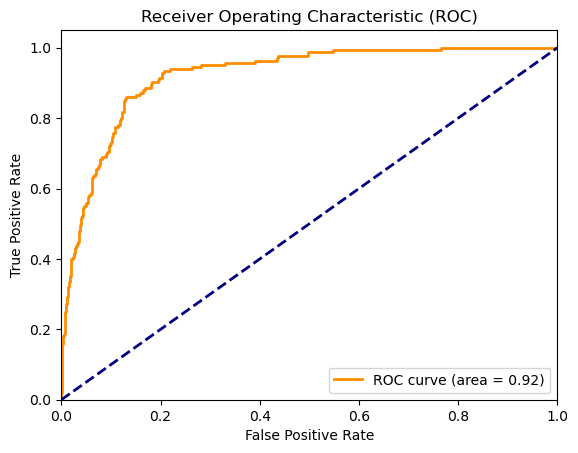

In [65]:
roc_auc = roc_auc_score(y_train, logit_y_pred)  

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression Performance - Training Set

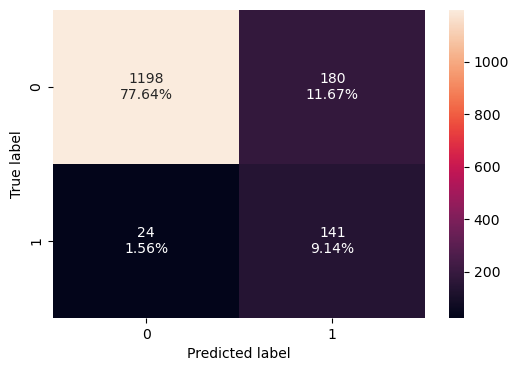

In [66]:
model_confusion_matrix(LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit)

In [67]:
logistic_regression_tuned_perf_train = pd.DataFrame(model_performance_classification(
    LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit
))
logistic_regression_tuned_perf_train

Accuracy    Recall  Precision        F1
0   0.86779  0.854545   0.439252  0.580247

In [68]:
y_tuned_train = LogisticReg_improved.predict(X_train_new_with_intercept)
y_tuned_pred = (y_tuned_train > optimal_threshold_logit).astype(int)
print(classification_report(y_train, y_tuned_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1378
           1       0.44      0.85      0.58       165

    accuracy                           0.87      1543
   macro avg       0.71      0.86      0.75      1543
weighted avg       0.92      0.87      0.89      1543



### Logistic Regression Performance - Test Set

In [69]:
common_columns = X_train_new_with_intercept.columns.intersection(X_test_new_with_intercept.columns)

X_train_new_with_intercept = X_train_new_with_intercept[common_columns]
X_test_new_with_intercept = X_test_new_with_intercept[common_columns]

print("Training data shape after alignment:", X_train_new_with_intercept.shape)
print("Testing data shape after alignment:", X_test_new_with_intercept.shape)


Training data shape after alignment: (1543, 46)
Testing data shape after alignment: (515, 46)


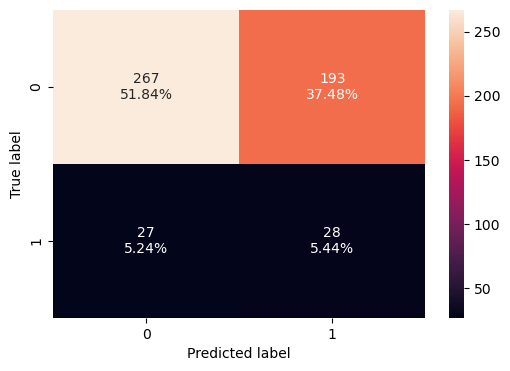

In [70]:
model_confusion_matrix(LogisticReg_improved, X_test_new_with_intercept, y_test, optimal_threshold_logit)

In [71]:
logistic_regression_tuned_perf_train = pd.DataFrame(model_performance_classification(
    LogisticReg_improved, X_test_new_with_intercept, y_test, optimal_threshold_logit
))
logistic_regression_tuned_perf_train

Accuracy    Recall  Precision        F1
0  0.572816  0.509091   0.126697  0.202899

## Model Performance Improvement - Random Forest

In [72]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [5, 7, 9],    
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [5, 6, 7],  
}

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 200}


In [73]:
best_rf_classifier = grid_search.best_estimator_

In [74]:
params_used = best_rf_classifier.get_params()

print("Parameters used in the Random Forest Classifier:")
for param_name, param_value in params_used.items():
    print(f"{param_name}: {param_value}")

Parameters used in the Random Forest Classifier:
bootstrap: True
ccp_alpha: 0.0
class_weight: balanced
criterion: gini
max_depth: 5
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 7
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 200
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


### Random Forest Performance - Training Set

In [75]:
y_imp_ran_train = grid_search.predict(X_train)

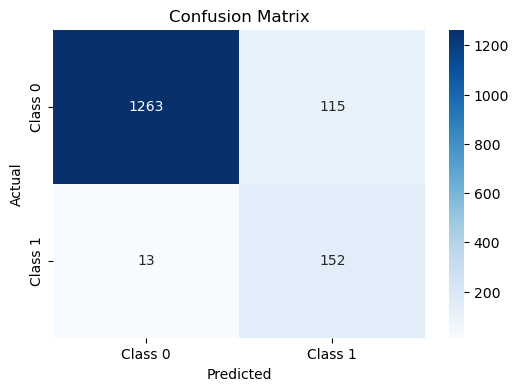

In [76]:
cm = confusion_matrix(y_train, y_imp_ran_train)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [77]:
metrics.confusion_matrix(y_train, y_imp_ran_train)

array([[1263,  115],
       [  13,  152]], dtype=int64)

In [78]:
print(classification_report(y_train, y_imp_ran_train))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1378
           1       0.57      0.92      0.70       165

    accuracy                           0.92      1543
   macro avg       0.78      0.92      0.83      1543
weighted avg       0.94      0.92      0.93      1543



In [79]:
cl_random_forest_tuned_perf_train = classification_report(y_train, y_imp_ran_train, output_dict=True)
random_forest_tuned_perf_train = pd.DataFrame(cl_random_forest_tuned_perf_train)

### Random Forest Performance - Test Set

In [80]:
y_imp_ran_test = grid_search.predict(X_test)

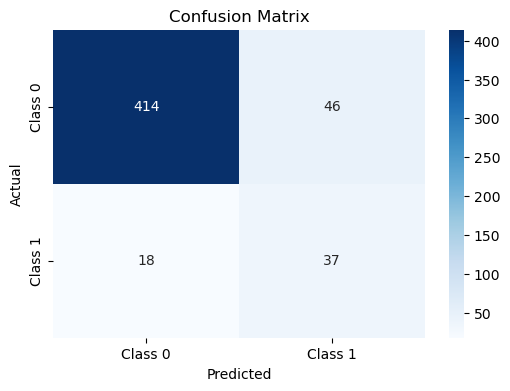

In [81]:
cm = confusion_matrix(y_test, y_imp_ran_test)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [82]:
metrics.confusion_matrix(y_test, y_imp_ran_test)

array([[414,  46],
       [ 18,  37]], dtype=int64)

In [83]:
print(classification_report(y_test, y_imp_ran_test))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       460
           1       0.45      0.67      0.54        55

    accuracy                           0.88       515
   macro avg       0.70      0.79      0.73       515
weighted avg       0.90      0.88      0.89       515



# Model Comparison and Final Model Selection

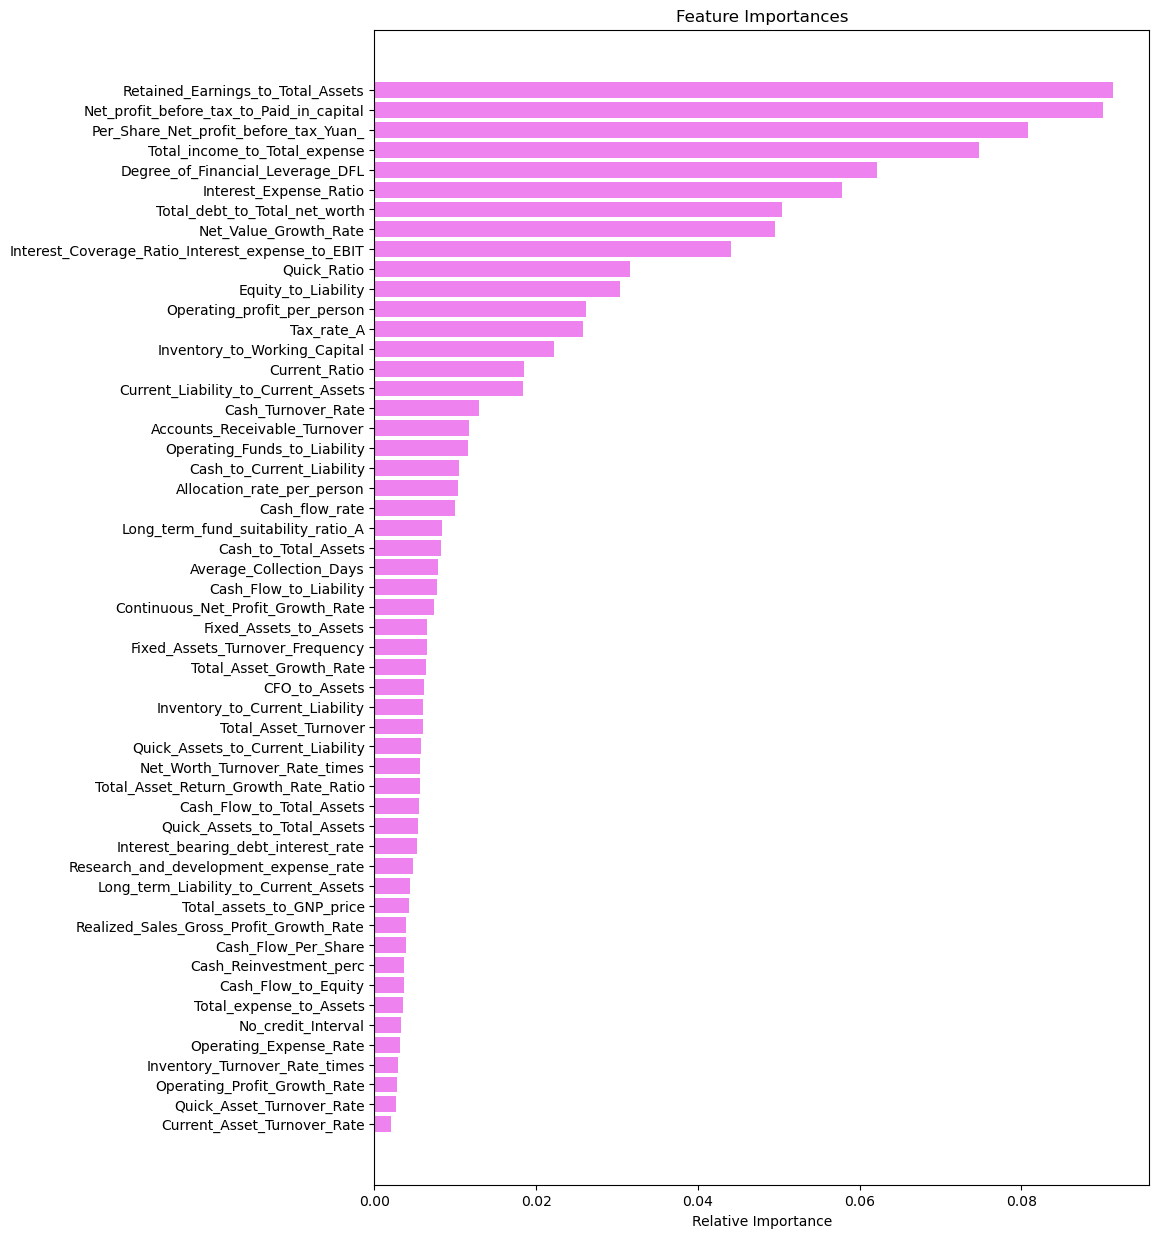

In [84]:
feature_names = X_train.columns
importances = best_rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 15))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()